In [1]:
from pylab import *
from scipy.stats import norm
from scipy import integrate

In [2]:
ruta1 = "/home/josuely/Documentos/Datos_art/DiversityK/Conjuntos/"
ruta1 = "Conjuntos/"

#orden idiomas
I1 = "EN"
I2 = "FR"
I3 = "GE"
I4 = "IT"
I5 = "SP"

#etiquetas

et_ab_a = I1 +"-"+ I2
et_ac_a = I1 +"-"+ I3
et_ad_a = I1 +"-"+ I4
et_ae_a = I1 +"-"+ I5

et_ab_b = I2 +"-"+ I1
et_ac_b = I2 +"-"+ I3
et_ad_b = I2 +"-"+ I4
et_ae_b = I2 +"-"+ I5

et_ab_c = I3 +"-"+ I1
et_ac_c = I3 +"-"+ I2
et_ad_c = I3 +"-"+ I4
et_ae_c = I3 +"-"+ I5

et_ab_d = I4 +"-"+ I1
et_ac_d = I4 +"-"+ I2
et_ad_d = I4 +"-"+ I3
et_ae_d = I4 +"-"+ I5

et_ab_e = I5 +"-"+ I1
et_ac_e = I5 +"-"+ I2
et_ad_e = I5 +"-"+ I3
et_ae_e = I5 +"-"+ I4


#detalles esteticos del codigo
C1_EN = [0, 0.52, 0.67]
C1_FR = [1, 0.46, 0]
C1_GE = [0.53, 0, 0.7]
C1_IT = [0.19, 0.51, 0.02]
C1_SP = [0.64, 0, 0]

#Cortes
X_1 = 0
X_2 = 5000

#años
Y_1 = 1740
Y_2 = 2009

#array con los años conttando desde el año 1
Years = arange(Y_1, Y_2+1, 1).tolist()

rcParams['figure.figsize'] = [18, 9]
rcParams['font.size'] = 18
rcParams['axes.labelsize'] = 18

In [3]:
DM_ab_a = load(ruta1 + 'DM_ab_a'+ '.npy').tolist()
DM_ac_a = load(ruta1 + 'DM_ac_a'+ '.npy').tolist()
DM_ad_a = load(ruta1 + 'DM_ad_a'+ '.npy').tolist()
DM_ae_a = load(ruta1 + 'DM_ae_a'+ '.npy').tolist()
DM_ab_b = load(ruta1 + 'DM_ab_b'+ '.npy').tolist()
DM_ac_b = load(ruta1 + 'DM_ac_b'+ '.npy').tolist()
DM_ad_b = load(ruta1 + 'DM_ad_b'+ '.npy').tolist()
DM_ae_b = load(ruta1 + 'DM_ae_b'+ '.npy').tolist()
DM_ab_c = load(ruta1 + 'DM_ab_c'+ '.npy').tolist()
DM_ac_c = load(ruta1 + 'DM_ac_c'+ '.npy').tolist()
DM_ad_c = load(ruta1 + 'DM_ad_c'+ '.npy').tolist()
DM_ae_c = load(ruta1 + 'DM_ae_c'+ '.npy').tolist()
DM_ab_d = load(ruta1 + 'DM_ab_d'+ '.npy').tolist()
DM_ac_d = load(ruta1 + 'DM_ac_d'+ '.npy').tolist()
DM_ad_d = load(ruta1 + 'DM_ad_d'+ '.npy').tolist()
DM_ae_d = load(ruta1 + 'DM_ae_d'+ '.npy').tolist()
DM_ab_e = load(ruta1 + 'DM_ab_e'+ '.npy').tolist()
DM_ac_e = load(ruta1 + 'DM_ac_e'+ '.npy').tolist()
DM_ad_e = load(ruta1 + 'DM_ad_e'+ '.npy').tolist()
DM_ae_e = load(ruta1 + 'DM_ae_e'+ '.npy').tolist()

In [12]:
np.savetxt('Conjuntos/diversidad_EN-FR.txt', DM_ab_a, delimiter=',')
np.savetxt('Conjuntos/diversidad_EN-GE.txt', DM_ac_a, delimiter=',')
np.savetxt('Conjuntos/diversidad_EN-IT.txt', DM_ad_a, delimiter=',')
np.savetxt('Conjuntos/diversidad_EN-SP.txt', DM_ae_a, delimiter=',')

np.savetxt('Conjuntos/diversidad_FR-EN.txt', DM_ab_b, delimiter=',')
np.savetxt('Conjuntos/diversidad_FR-GE.txt', DM_ac_b, delimiter=',')
np.savetxt('Conjuntos/diversidad_FR-IT.txt', DM_ad_b, delimiter=',')
np.savetxt('Conjuntos/diversidad_FR-SP.txt', DM_ae_b, delimiter=',')

np.savetxt('Conjuntos/diversidad_GE-EN.txt', DM_ab_c, delimiter=',')
np.savetxt('Conjuntos/diversidad_GE-FR.txt', DM_ac_c, delimiter=',')
np.savetxt('Conjuntos/diversidad_GE-IT.txt', DM_ad_c, delimiter=',')
np.savetxt('Conjuntos/diversidad_GE-SP.txt', DM_ae_c, delimiter=',')

np.savetxt('Conjuntos/diversidad_IT-EN.txt', DM_ab_d, delimiter=',')
np.savetxt('Conjuntos/diversidad_IT-FR.txt', DM_ac_d, delimiter=',')
np.savetxt('Conjuntos/diversidad_IT-GE.txt', DM_ad_d, delimiter=',')
np.savetxt('Conjuntos/diversidad_IT-SP.txt', DM_ae_d, delimiter=',')

np.savetxt('Conjuntos/diversidad_SP-EN.txt', DM_ab_e, delimiter=',')
np.savetxt('Conjuntos/diversidad_SP-FR.txt', DM_ac_e, delimiter=',')
np.savetxt('Conjuntos/diversidad_SP-GE.txt', DM_ad_e, delimiter=',')
np.savetxt('Conjuntos/diversidad_SP-IT.txt', DM_ae_e, delimiter=',')


In [7]:
def sigmoide_ms(diversidad, mu, sigma):
    K = arange(0,len(diversidad))+1
    val = []
    def fsig(x):
        c = 1 /(sigma*sqrt(2*pi)) 
        y = exp( (-(x-mu)**2) / (2* sigma**2) ) 
        return y*c
    for i in range(0,len(K)):
        k = K[i]
        if log10(k) == 0:
            b = log10(2)/2
        elif log10(k) >0:
            b = log10(k)
        res = integrate.quad(fsig, -inf, b)
        val.append(res[0])
    return K, val

In [8]:
rcParams['figure.figsize'] = [10, 10]

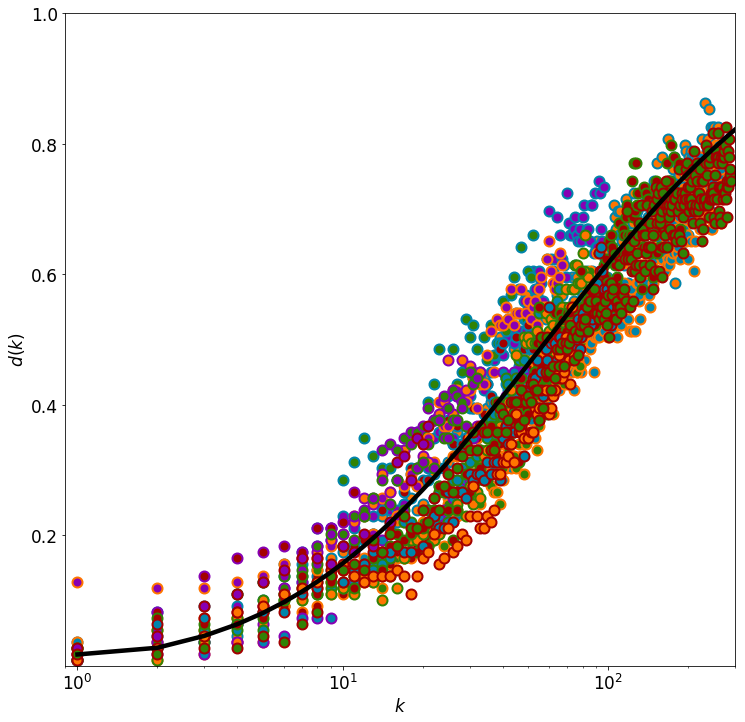

In [11]:
SG_ajuste = sigmoide_ms(arange(1,300), 1.7709, 0.7661)
########################################
#### General para todos los idiomas ####
########################################
rcParams['figure.figsize'] = [12, 12]
rcParams['font.size'] = 17
rcParams['axes.labelsize'] = 17

size  = 100
borde = 2

scatter(arange(0, len(DM_ab_a))+1, DM_ab_a, s= size, edgecolor= C1_EN, linewidth=borde, facecolor= C1_FR, label = et_ab_a) #EN-FR
scatter(arange(0, len(DM_ac_a))+1, DM_ac_a, s= size, edgecolor= C1_EN, linewidth=borde, facecolor= C1_GE, label = et_ac_a) #EN-GE
scatter(arange(0, len(DM_ad_a))+1, DM_ad_a, s= size, edgecolor= C1_EN, linewidth=borde, facecolor= C1_IT, label = et_ad_a) #EN-IT
scatter(arange(0, len(DM_ae_a))+1, DM_ae_a, s= size, edgecolor= C1_EN, linewidth=borde, facecolor= C1_SP, label = et_ae_a) #EN-SP

scatter(arange(0, len(DM_ab_b))+1, DM_ab_b, s= size, edgecolor= C1_FR, linewidth=borde, facecolor= C1_EN, label = et_ab_b) #FR-EN
scatter(arange(0, len(DM_ac_b))+1, DM_ac_b, s= size, edgecolor= C1_FR, linewidth=borde, facecolor= C1_GE, label = et_ac_b) #FR-GE
scatter(arange(0, len(DM_ad_b))+1, DM_ad_b, s= size, edgecolor= C1_FR, linewidth=borde, facecolor= C1_IT, label = et_ad_b) #FR_IT
scatter(arange(0, len(DM_ae_b))+1, DM_ae_b, s= size, edgecolor= C1_FR, linewidth=borde, facecolor= C1_SP, label = et_ae_b) #FR-SP

scatter(arange(0, len(DM_ab_c))+1, DM_ab_c, s= size, edgecolor= C1_GE, linewidth=borde, facecolor= C1_EN, label = et_ab_c) #GE_EN
scatter(arange(0, len(DM_ac_c))+1, DM_ac_c, s= size, edgecolor= C1_GE, linewidth=borde, facecolor= C1_FR, label = et_ac_c) #GE-FR
scatter(arange(0, len(DM_ad_c))+1, DM_ad_c, s= size, edgecolor= C1_GE, linewidth=borde, facecolor= C1_IT, label = et_ad_c) #GE-IT
scatter(arange(0, len(DM_ae_c))+1, DM_ae_c, s= size, edgecolor= C1_GE, linewidth=borde, facecolor= C1_SP, label = et_ae_c) #GE-SP

scatter(arange(0, len(DM_ab_d))+1, DM_ab_d, s= size, edgecolor= C1_IT, linewidth=borde, facecolor= C1_EN, label = et_ab_d) #IT-EN
scatter(arange(0, len(DM_ac_d))+1, DM_ac_d, s= size, edgecolor= C1_IT, linewidth=borde, facecolor= C1_FR, label = et_ac_d) #IT-FR
scatter(arange(0, len(DM_ad_d))+1, DM_ad_d, s= size, edgecolor= C1_IT, linewidth=borde, facecolor= C1_GE, label = et_ad_d) #IT-GE
scatter(arange(0, len(DM_ae_d))+1, DM_ae_d, s= size, edgecolor= C1_IT, linewidth=borde, facecolor= C1_SP, label = et_ae_d) #IT-SP

scatter(arange(0, len(DM_ab_e))+1, DM_ab_e, s= size, edgecolor= C1_SP, linewidth=borde, facecolor= C1_EN, label = et_ab_e) #SP-EN
scatter(arange(0, len(DM_ac_e))+1, DM_ac_e, s= size, edgecolor= C1_SP, linewidth=borde, facecolor= C1_FR, label = et_ac_e) #SP-FR
scatter(arange(0, len(DM_ad_e))+1, DM_ad_e, s= size, edgecolor= C1_SP, linewidth=borde, facecolor= C1_GE, label = et_ad_e) #SP-GE
scatter(arange(0, len(DM_ae_e))+1, DM_ae_e, s= size, edgecolor= C1_SP, linewidth=borde, facecolor= C1_IT, label = et_ae_e) #SP-IT

plot(SG_ajuste[0], SG_ajuste[1], 'k', linewidth=4.5, label = 'Ajuste')
ylabel(r' $d(k)$     ', rotation=90, fontsize = 17)
xlabel(r'$k$', fontsize=17)
yticks([0.2, 0.4, 0.6, 0.8, 1])
xticks([0,1,2])
ylim(0,1)
xlim(0.9*10**0, 3*10**2)
xscale('log')
#axis('equal')

#legend(loc=0, ncol=5, frameon=False, handlelength=0.7, fontsize = 10)
#savefig('DR_log.png', bbox_inches = 'tight')